# Importing Libraries & Connect to drive

In [ ]:
!pip install networkx==3.5rc0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires n

In [ ]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import statistics
import community

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Data_Analysis/Ukraine_Tweet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Analysis/Ukraine_Tweet


# Reading Data

<b>About the dataset</b>

The dataset was taken from Kaggle that describes about Russo-Ukrainian conflict conversation in Twitter. The data was taken using Twitter API in the year of 2022 in the same year the conflict has started. The dataset can be checked <a href="https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/data">here</a>. The dataset has been cleaned by removing empty rows based on the column in_reply_to_screen_name and took only the columns of username and in_reply_to_screen_name before renamed to Source and Target.
<br/>
<br/>
Data as of: 19/08/2022 <br/>
Note: Only 1 day due to memory issue


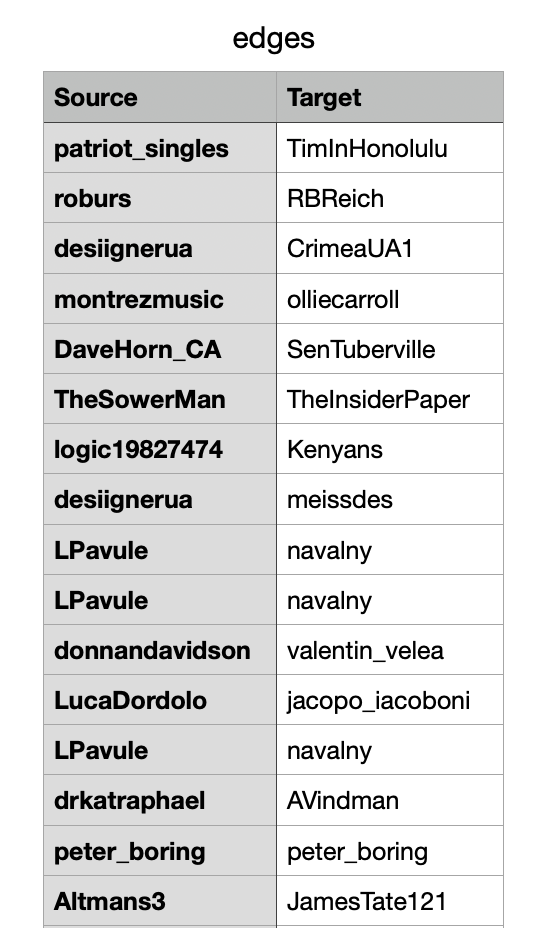

In [ ]:
df = pd.read_csv("edges.csv")

In [ ]:
df.head()

,Source,Target
0,patriot_singles,TimInHonolulu
1,roburs,RBReich
2,desiignerua,CrimeaUA1
3,montrezmusic,olliecarroll
4,DaveHorn_CA,SenTuberville


In [ ]:
G = nx.from_pandas_edgelist(df, source="Source", target="Target", create_using=nx.DiGraph())

In [ ]:
df.isnull().sum()

,0
Source,0
Target,0


# Basic Statistics

## Number of Nodes and Edges

In [ ]:
G.number_of_nodes()

10874

In [ ]:
G.number_of_edges()

10282

Based on the information above, the number of nodes in this dataset are <b>10847</b> and the number of edges are <b>10282</b>.

# Network

## Density

In [ ]:
nx.density(G)

8.69638749424632e-05

Density is used to determine whether the network is well connected or not. Density is measured between 0 and 1. 0 means there is no connection at all while 1 means every user interacts with every other user.

The number of density is aprroximately 0.000087 which is very low. It can be concluded that either:
<ul>
  <li>People engage in small groups.</li>
  <li>Not everyone replies or mentions everyone else.</li>
</ul>

## Graph Plot

We use directed graph for the network graph as twitter user can reply to other user which can be drawn as directed graph. This will come useful later to determine who are the influential actors behind this case. The graph is drawn with Gephy since drawing with code is almost impossible due to code complexity and the size of the graph. The color is based on the modularity and the size of the node is based on the pagerank. The graph is drawn with Yifan Hu Proportional and ForceAtlas 2 Algorithm.

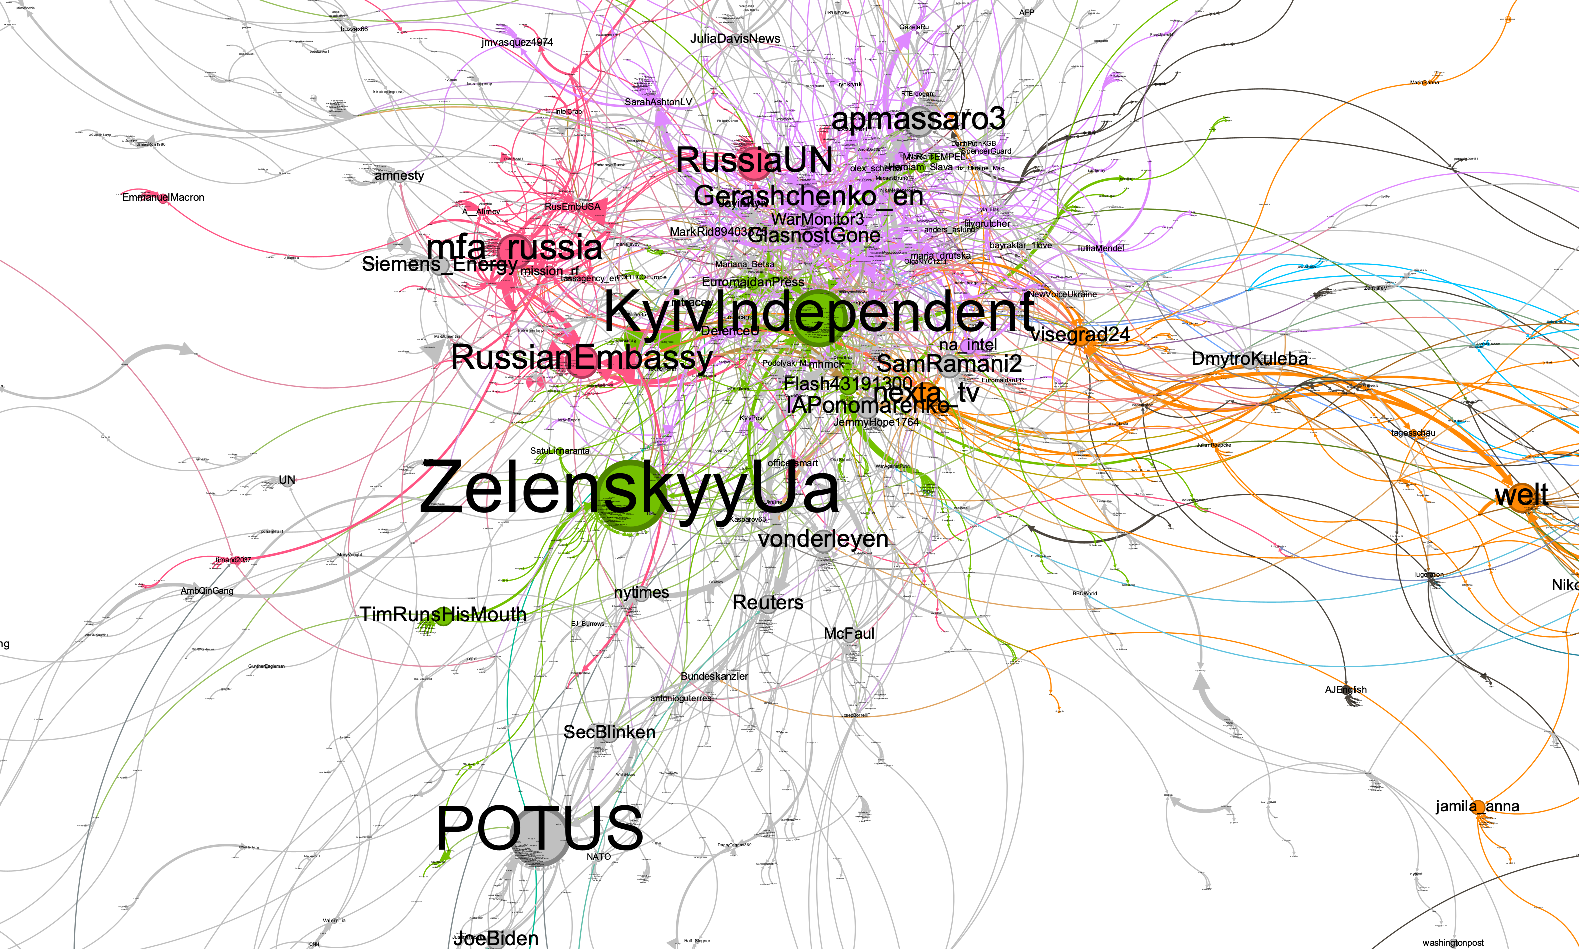

# Centrality

## Closeness Centrality

We will check the closeness centrality. This can be used to identify important influencers in viral marketing (not just popular, but well-positioned). In other word, this can be used to answer the question "Who can reach everyone else the fastest?"

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('ZelenskyyUa', 0.007540706245737238),
 ('KyivIndependent', 0.006975106790623911),
 ('POTUS', 0.0059794836175052265),
 ('igorlachenkov', 0.00491095607438843),
 ('apmassaro3', 0.004394317278093063),
 ('MAStrackZi', 0.004271721564557029),
 ('mfa_russia', 0.004154922338658631),
 ('Gerashchenko_en', 0.004124420820951613),
 ('SWagenknecht', 0.004036661914834912),
 ('nexta_tv', 0.003858329155083768)]

## Betweenness Centrality

We will check the betweenness centrality. We use this to identify influencers or gatekeepers in a social or communication network. Example of gatekeeper: A person who knows multiple friend groups and can pass information between them.

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('SarahAshtonLV', 3.679852619110992e-06),
 ('schayno_karas', 2.76623403781447e-06),
 ('Pan_M_165', 2.4405459324448765e-06),
 ('AndrzejGrochow7', 2.0302635139922715e-06),
 ('8113Kgreen', 1.7257239868934307e-06),
 ('heyserbernar', 1.5946028016147632e-06),
 ('flunkertungle9', 1.1758609518538572e-06),
 ('tipofthespear42', 9.64375169146329e-07),
 ('AnikaDeMadrid', 9.474563065297267e-07),
 ('huidneprodym', 8.459431308301131e-07)]

## Degree Centrality

The person with higher friend count in a
social network is the one that is more central
according to this metric. The function below will count the overall (in and out) degree in our graph.

In [ ]:
degree_centrality = nx.degree_centrality(G)
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('ZelenskyyUa', 0.007909500597811092),
 ('KyivIndependent', 0.007541616849075693),
 ('POTUS', 0.005978110916950244),
 ('AndrzejGrochow7', 0.005518256231030995),
 ('igorlachenkov', 0.004874459670744045),
 ('SaintMoonKyiv', 0.004874459670744045),
 ('huidneprodym', 0.004782488733560195),
 ('apmassaro3', 0.004690517796376345),
 ('NickYashika', 0.004414604984824795),
 ('nexta_tv', 0.0043226340476409456)]

Now we got the overall degree centrality but let's check the in and out degree centrality. Here is some useful information about the in degree and out degree centrality.

In-degree centrality: Measures number of times a user is mentioned/retweeted. Used for finding influential users. <br/>
Out-degree centrality: Measures number of times a user mentions others. Used for finding most active users.

In [ ]:
in_degree_centrality = nx.in_degree_centrality(G)

sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('ZelenskyyUa', 0.007909500597811092),
 ('KyivIndependent', 0.007541616849075693),
 ('POTUS', 0.005978110916950244),
 ('igorlachenkov', 0.004874459670744045),
 ('apmassaro3', 0.004690517796376345),
 ('Gerashchenko_en', 0.004230663110457096),
 ('nexta_tv', 0.004230663110457096),
 ('MAStrackZi', 0.004230663110457096),
 ('mfa_russia', 0.004138692173273246),
 ('SWagenknecht', 0.004046721236089396)]

Now we got the in degree centrality and we collected the top 10 influential users. However this method has some drawback which we will discuss later.

In [ ]:
out_degree_centrality = nx.out_degree_centrality(G)

sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('AndrzejGrochow7', 0.005426285293847145),
 ('SaintMoonKyiv', 0.004874459670744045),
 ('huidneprodym', 0.004506575922008645),
 ('NickYashika', 0.004138692173273246),
 ('yoga_and_more', 0.004138692173273246),
 ('schayno_karas', 0.004046721236089396),
 ('sukhan1927', 0.003954750298905546),
 ('DaveHorn_CA', 0.0037708084245378463),
 ('Katerin19848594', 0.0037708084245378463),
 ('yoksig', 0.0034029246758024464)]

We also collected the list of out degree centrality and the top 10 active users. However while determining the top 10 influential users, there is better method that we can use that is PageRank algorithm. There are some drawbacks with the degree centrality algorithm:

*   It only considers the number of mentions, not the quality of mentions.
*   All mentions are treated equally, whether from a highly influential user or a random bot.

## PageRank

On Twitter, the interaction network (mentions, replies, retweets) can be modeled as a directed graph:

Nodes = Users (Twitter accounts) <br/>
Edges = Mentions, replies, or retweets (e.g., if @userA mentions @userB, there is a directed edge from A → B) <br/>

Since important users get mentioned by many other important users, the network naturally follows PageRank logic.

For example:

If Elon Musk tweets and gets many replies, his PageRank score increases. <br/>
If a small account gets retweeted by Elon Musk, it gains indirect influence, increasing its PageRank. <br/>
If a user is mentioned often by other high-ranked users, their influence increases.

In [ ]:
edges = list(zip(df["Source"], df["Target"]))
G.add_edges_from(edges)

pagerank = nx.pagerank(G)
top_spreaders = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
top_spreaders

[('nexta_tv', 0.006169678235467667),
 ('watch_union', 0.004078763865473425),
 ('sternenko', 0.003312421150397376),
 ('pdnetwork', 0.0032337373641023433),
 ('ZelenskyyUa', 0.0026475512839943607),
 ('MarkRid89403375', 0.002580927276719425),
 ('POTUS', 0.0022168417433035066),
 ('KyivIndependent', 0.0020821828866381237),
 ('igorlachenkov', 0.0019424532649446587),
 ('KathaSchulze', 0.0016381476575100275)]

# Information Diffusion

Next we will check the information spread. We will use the user AndrzejGrochow7 as the main infection base since he is the most active user(out-degree centrality). This code will show step by step on how Andzrej spread the information and who forward his information on that day.

Step 0: Infected = {'AndrzejGrochow7'}


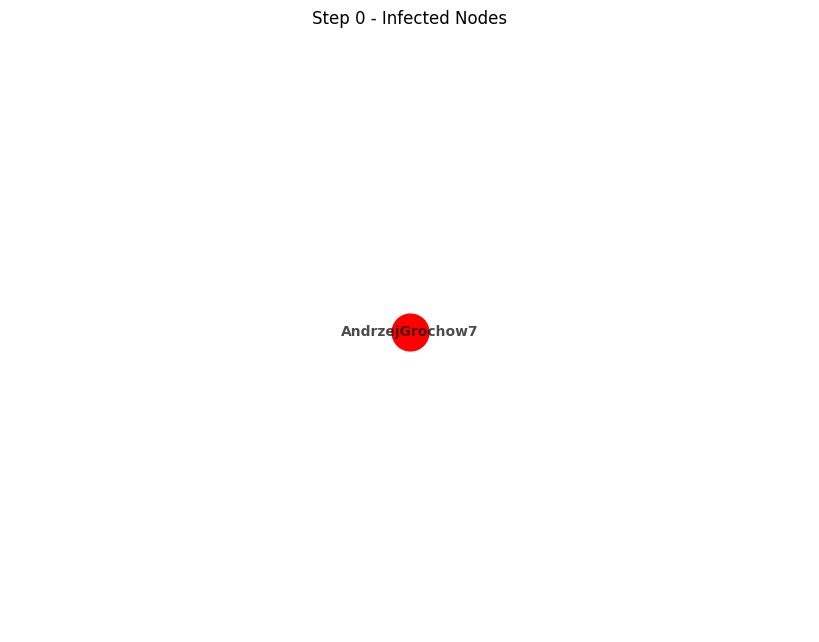

Step 1: Infected = {'UkraineDiary', 'nexta_tv', 'RALee85', 'btenoire8', 'Hromadske', 'DefenceU', 'flunkertungle9', 'Gerashchenko_en', 'maria_drutska', 'OlekKorn', 'UATV_en', 'WarMonitor3', 'igorsushko', 'KyivIndependent', 'lilygrutcher', 'PaulConRO', 'SenaC41043142', 'AnonOpsSE', 'JayinKyiv', 'EuromaidanPress', 'NikaMelkozerova', 'NATOpress', 'KremlinTrolls', 'ArmedMaidan', 'SamRamani2', 'Lyla_lilas', 'DevinPifer', 'pravda_eng', 'JosepBorrellF', 'rynkrynk', 'AlarKaris', 'HannaLiubakova', 'UKRinAUS', 'kerziouk', 'MSnegovaya', 'Anna34366210', 'Flash43191300', 'MotolkoHelp', 'copesint', 'IuliiaMendel', 'UkraineNowMedia', 'LinkeviciusL', 'ResistUA', 'truth_sharethe', 'maxseddon', 'sakamori_miyuki', 'NewVoiceUkraine', 'U24_gov_ua', 'PowerVertical', 'ukraine_world', 'CaptainBlackSe1', 'Podolyak_M', 'AlexKokcharov', 'na_intel', 'WarAgainstPutin', 'sliecas', 'Lynski_07', 'SpoogemanGhost', 'Bcd_bcd_1234'}


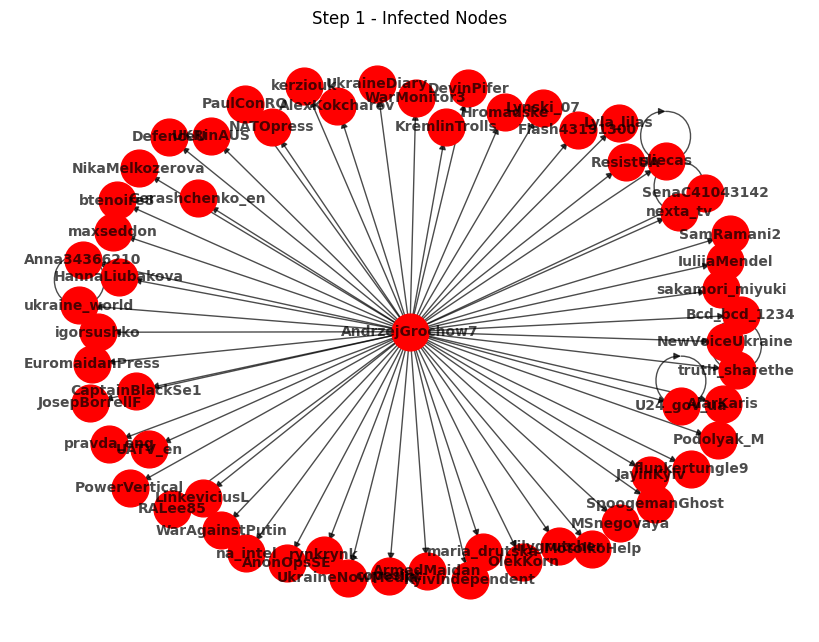

Step 2: Infected = {'Pokers1000', 'asssasaaaas', 'visegrad24', 'IrynaBuczkowski', 'beeeeemoooooo', 'Animamorta_', '8113Kgreen'}


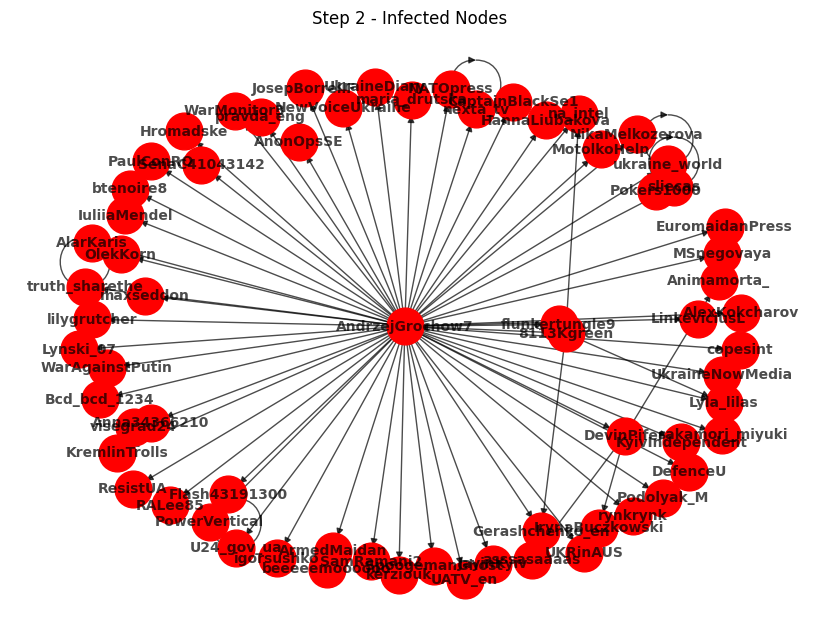

Step 3: Infected = {'Pr_Ruddy', 'GlasnostGone', 'MarkRid89403375'}


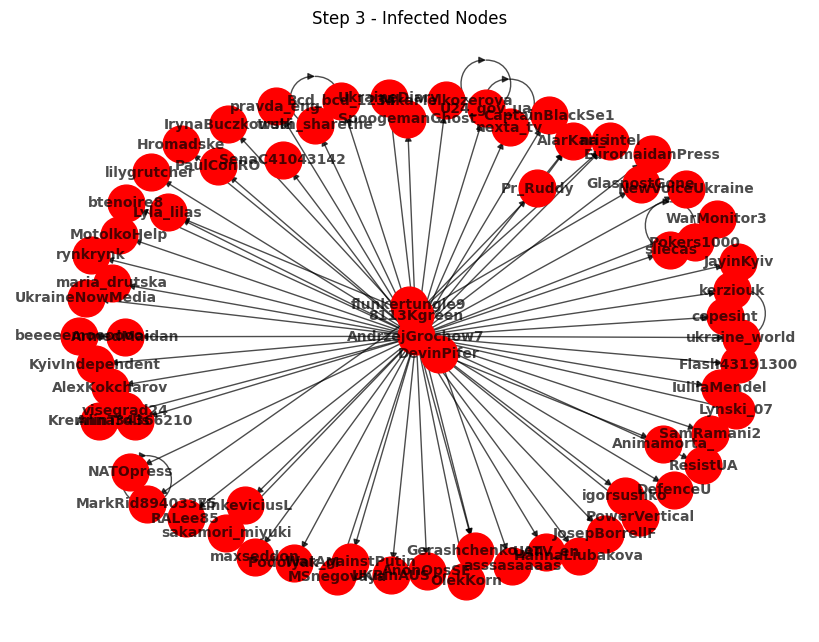

In [ ]:
infected = {'AndrzejGrochow7'}
all_infected = set(infected)
steps = [infected.copy()]

def plot_step(infected_nodes, step_num):
    subgraph = G.subgraph(infected_nodes)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, node_size=500, with_labels=True, font_weight='bold', node_color='lightblue', font_size=10, alpha=0.7)
    nx.draw_networkx_nodes(subgraph, pos, nodelist=infected_nodes, node_color='red', node_size=700)
    plt.title(f"Step {step_num} - Infected Nodes")
    plt.show()

step_num = 0
print(f"Step {step_num}: Infected = {infected}")
plot_step(infected, step_num)

while True:
    step_num += 1
    new_infected = set()
    for node in infected:
        neighbors = list(G.successors(node))
        for n in neighbors:
            if n not in all_infected:
                new_infected.add(n)
    if not new_infected:
        break
    infected = new_infected
    all_infected.update(new_infected)
    steps.append(all_infected.copy())
    print(f"Step {step_num}: Infected = {infected}")
    plot_step(all_infected, step_num)


In [ ]:
len(all_infected)

70

# Community Detection

## Importing Data and Creating Graph

In [ ]:
df = pd.read_csv("edges.csv")
G = nx.from_pandas_edgelist(df, "Source", "Target", create_using=nx.DiGraph())

## Louvain Method

In [ ]:
Louvain = list(nx.community.louvain_communities(G))
print("Number of communities detected by Louvain:", len(Louvain))
modularity_score = nx.community.modularity(G, Louvain)
print(f"Modularity of the Louvain partition: {modularity_score:.4f}")

Number of communities detected by Louvain: 2720
Modularity of the Louvain partition: 0.9260


In [ ]:
community_counts = []

for i in range(5):
    Louvain = list(nx.community.louvain_communities(G))
    count = len(Louvain)
    community_counts.append(count)
    print(f"Run {i+1}: {count} communities")
    modularity_score = nx.community.modularity(G, Louvain)
    print(f"Modularity of the Louvain partition: {modularity_score:.4f}")

average_communities = statistics.mean(community_counts)
print(f"\nAverage number of communities detected by Louvain over 5 runs: {average_communities}")

Run 1: 2721 communities
Modularity of the Louvain partition: 0.9272
Run 2: 2721 communities
Modularity of the Louvain partition: 0.9279
Run 3: 2716 communities
Modularity of the Louvain partition: 0.9269
Run 4: 2718 communities
Modularity of the Louvain partition: 0.9266
Run 5: 2724 communities
Modularity of the Louvain partition: 0.9284

Average number of communities detected by Louvain over 5 runs: 2720


Using the Louvain method, we got the average of 2720 communities in total. This big numbers might be caused of the sparse graph with few edges.

In [ ]:
sorted_communities = sorted(Louvain, key=len, reverse=True)
top_communities = sorted_communities[:5]

for i, community in enumerate(top_communities, 1):
    print(f"\nCommunity {i} (size: {len(community)}):")
    print(sorted(community))


Community 1 (size: 434):
['01_coins', '123vik2', '1i0o1i0o1i', '1tvru_news', '3DTechPrep', '666_mancer', '73Fany', '73RDARM', 'ALETTAHA', 'AMYIS18', 'AMetDomestici', 'AP', 'Abyss1963', 'AdityaRajKaul', 'AlarKaris', 'AleksDN1', 'AlgisKuliukas', 'AlisterNayi', 'AltenhoferAchim', 'Amazing_Johnny_', 'AmirMateen2', 'AmitTiw73779776', 'AndreaBrowniee', 'AndriusTapinas', 'AnnaJ66545951', 'AnthonySabatini', 'AnttiParonen', 'AskAnshul', 'Asunakir14', 'AzovstalFam', 'BarnardKimberly', 'BasilHanna4', 'Bassieman73', 'Birisi_xy', 'BoyrazEnes', 'Brodd_fst', 'CHILDOFGOD5775', 'CTirinzoni', 'CarlaoRubens', 'Chhendricks', 'ChriXCoenen', 'ChuckPfarrer', 'Chuks_Dave', 'CindyJane4', 'ClaireKraatz', 'CleoXVII', 'Clint_on41', 'Coalsmoke1', 'CornishMiner186', 'Covbluenose', 'Craigpo79687960', 'CupofJoeintheD2', 'Cze_Eugene', 'DI_Ukraine', 'DShulga', 'DStaraj', 'DaisiesRambles', 'DeanoRichards9', 'DefenceHQ', 'DexterSinister9', 'Digikev1', 'DistractedAnna', 'DrOz', 'DrumbegTwit', 'Dunc226', 'EcclesGirl1', 'E

In [ ]:
target_user = "RussiaUN"

for i, community in enumerate(top_communities, 1):
    if target_user in community:
        print(f"{target_user} found in Community {i} (size: {len(community)}):")
        print(sorted(community))
        break
else:
    print(f"{target_user} not found in the top communities.")

RussiaUN found in Community 4 (size: 287):
['0Elsie2', '3GDEFdMYkyhgqZb', '9thousandbytes', 'AGurulyov', 'AKorybko', 'ARussianSpy666', 'ATGuerreiro', 'A__Alimov', 'Aerys555', 'AfricaChinaLink', 'AliedeChibuzor2', 'AlinaLipp', 'AllenMcInnis', 'AmbVasyl', 'Anarchazazel', 'Anastasiya1451A', 'AnimalRescueU', 'AnitaOdberg', 'Anna_Lena2022', 'Armchair0', 'AurFerteFogel', 'AvgerinosMoscow', 'B3man1', 'BMFDL81', 'BackpackingMod', 'Banterman21', 'BarretteDugan', 'BarrySchachter', 'BeenDunOver', 'Been_Wondering', 'Bianca_bibi1204', 'BillSte00228417', 'BlueEagle_223', 'BlueNCarolina', 'BomanRafael', 'Boomersaurus', 'CZingelis', 'CarlyleGbei13', 'Chainy67', 'Chendler_Bing__', 'Chris_Grasihasi', 'ComradeAmongus', 'CyberEastwood', 'DavidRodEngr', 'DigitalowlT', 'DjtTyler', 'Dreamer2909', 'Duttilive', 'EasternSpring', 'Egbe000', 'Elinsommer', 'EmbRusiaEnArgEs', 'EmbRusiaEnArgRu', 'EmbassyofRussia', 'EmmanuelMacron', 'EnjoyAnonDuck', 'Europarl_ES', 'FAliieva', 'Forgotten_Music', 'FrankMarques', 'Frank